In [55]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from functions import polar_coord, get_classes, get_wrinkle_class # Our functions 

In [61]:
def reverse_from_linear_polarity(original_X, item_to_be_reversed):
    x, y, r = original_X.shape[0]/2, original_X.shape[1]/2, np.sqrt(((original_X.shape[0]/2.0)**2.0)+((original_X.shape[1]/2.0)**2.0))
    X_inverse = cv2.linearPolar(item_to_be_reversed, (x, y), r, cv2.WARP_INVERSE_MAP)
    return X_inverse

In [57]:
filename = 'phz_170725_D3.jpg'

In [58]:
img = Image.open(filename)

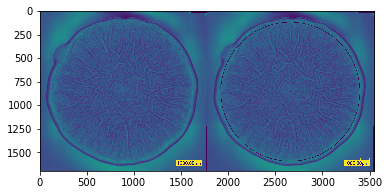

In [162]:
#size = 128
#image = cv2.resize(cv2.imread('phz_170725_D3.jpg', 0), (size,size))
image = cv2.imread(filename, 0)
size = np.sqrt(image.size)
output = image.copy()
center_x, center_y = None, None
circles = cv2.HoughCircles(image,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius= int(size*5/12), maxRadius= int(size/2))
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        center_x, center_y = x, y
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        break
    # show the output image
    plt.imshow(np.hstack([image, output]))


In [60]:
img = Image.open(filename)
img_array=np.asarray(img)

/Users/Kiki/anaconda/envs/capstone/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/Users/Kiki/anaconda/envs/capstone/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in int_scalars
  # Remove the CWD from sys.path while we load stuff.


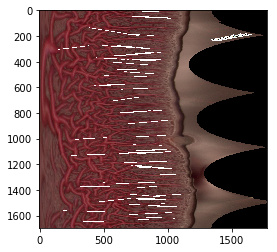

In [169]:
wrinkle_labels,img_wrinkle_class=get_wrinkle_class(img)
polar_img_wrinkle = polar_coord(img_wrinkle_class)
polar_img=polar_coord(img_array)
edges = cv2.Canny(polar_img_wrinkle,40,70) 

lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=150, minLineLength=200,maxLineGap=30)
reserved_lines = []
for line in lines:
    coords=line[0]
    slope=(coords[3]-coords[1])/(coords[2]-coords[0])
    if slope > -0.2 and slope <0.2:
        reserved_lines.append(line)
        cv2.line(polar_img,(coords[0],coords[1]),(coords[2],coords[3]),[255,255,255],3)
plt.imshow(polar_img)

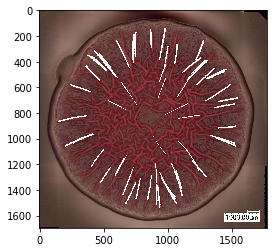

In [160]:
plt.imshow(reverse_from_linear_polarity(img_array, polar_img))

In [98]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)


1776

In [142]:
row = len(polar_img_wrinkle)
column = len(polar_img_wrinkle[0])
t_pi = np.pi*2
max_radius = 1227.5179224760834
Klin = column / max_radius
Kangle = row / t_pi

In [170]:
cart_lines = []
for line in reserved_lines:
    
    coords=line[0]
    rho_1, phi_1, rho_2, phi_2 = coords[0], coords[1], coords[2], coords[3]
    angleRad1 = phi_1 / Kangle
    magnitude1 = rho_1 / Klin
    x1 = magnitude1 * np.cos(angleRad1)
    y1 =  magnitude1 * np.sin(angleRad1)
    angleRad2 = phi_2 / Kangle
    magnitude2 = rho_2 / Klin
    x2 = magnitude2 * np.cos(angleRad2)
    y2 =  magnitude2 * np.sin(angleRad2)
    cart_lines.append([[int(x1+847.5), int(y1+888.0),int(x2+847.5), int(y2+888.0)]])

433.75684432640367

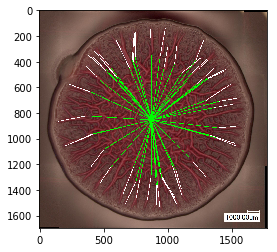

In [175]:
original_image = img_array.copy()
threshold_size = np.sqrt(image.size)/3
for line in cart_lines:
    coords=line[0]
    dis = np.sqrt((center_x - coords[2])**2 + (center_y - coords[3]) **2)
    if dis > threshold_size:
        cv2.line(original_image,(coords[0],coords[1]),(coords[2],coords[3]),[255,255,255],3)
        cv2.line(original_image,(center_x,center_y),(coords[0],coords[1]),[0,255,0],3)
plt.imshow(original_image)